In [78]:
import pandas as pd
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from ultralytics import YOLO

In [24]:
def preprocess_data(image_dir, label_dir):
    images = []
    labels = []
    
    # Load images and corresponding labels
    for image_file in os.listdir(image_dir):
        if image_file.endswith('.jpg'):
            image_path = os.path.join(image_dir, image_file)
            label_path = os.path.join(label_dir, image_file.replace('.jpg', '.txt'))
            
            # Load image
            image = cv2.imread(image_path)
            image = cv2.resize(image, (416, 416))  # Resize to match YOLO input size
            images.append(image)
            
            # Parse label file
            with open(label_path, 'r') as f:
                label = f.readline().strip().split()
                label = [float(x) for x in label]  # Convert labels to float
                labels.append(label)
    
    return np.array(images), np.array(labels)

In [25]:
# Replace 'images/train', 'images/val', 'labels/train', and 'labels/val' with your actual directory paths
train_images, train_labels = preprocess_data('images/train', 'labels/train')
val_images, val_labels = preprocess_data('images/val', 'labels/val')

In [ ]:
epochs = 10
batch_size = 16

In [41]:
model = YOLO('yolov5s.pt')  # 'yolov5s.pt' is a small version of YOLOv5

PRO TIP  Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|█████████████████████████████████████████████████████████████████████████████| 17.7M/17.7M [00:02<00:00, 6.20MB/s]


In [42]:
epochs = 10
batch_size = 16

In [48]:
# results = model.train(data='stadium.yaml', epochs=epochs, batch=batch_size, early_stop=3)
results = model.train(data='./stadium.yaml')

Ultralytics YOLOv8.2.18  Python-3.11.5 torch-2.2.2+cpu CPU (Intel Core(TM) i5-9400F 2.90GHz)
engine\trainer: task=detect, mode=train, model=yolov5s.pt, data=./stadium.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

100%|███████████████████████████████████████████████████████████████████████████████| 755k/755k [00:00<00:00, 7.76MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      3520  ultralytics.nn.modules.conv.Conv             [3, 32, 6, 2, 2]              
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     18816  ultralytics.nn.modules.block.C3              [64, 64, 1]                   
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    115712  ultralytics.nn.modules.block.C3              [128, 128, 2]                 
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  3    625152  ultralytics.nn.modules.block.C3              [256, 256, 3]                 
  7                  -1  1   1180672  ultralytics

train: Scanning F:\DS Tools\DS Tools\Thesis\ACV\YOLO\datasets\labels\train... 40 images, 0 backgrounds, 0 corrupt: 100%

train: New cache created: F:\DS Tools\DS Tools\Thesis\ACV\YOLO\datasets\labels\train.cache



val: Scanning F:\DS Tools\DS Tools\Thesis\ACV\YOLO\datasets\labels\val... 3 images, 0 backgrounds, 0 corrupt: 100%|████

val: New cache created: F:\DS Tools\DS Tools\Thesis\ACV\YOLO\datasets\labels\val.cache


Plotting labels to runs\detect\train4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      1.423      3.836      1.459         20        640: 100%|██████████| 3/3 [00:23<00:00,  7.95
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.836       0.25      0.464      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G      1.329      2.219      1.346         19        640: 100%|██████████| 3/3 [00:21<00:00,  7.31
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.737       0.75      0.711      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G      1.206      1.804      1.199         18        640: 100%|██████████| 3/3 [00:22<00:00,  7.41
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4       0.99       0.75      0.774      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G      1.143      1.459      1.151         17        640: 100%|██████████| 3/3 [00:22<00:00,  7.45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.807       0.75       0.87      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G      1.145      1.303      1.104         15        640: 100%|██████████| 3/3 [00:22<00:00,  7.42
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4          1      0.747      0.754      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         0G     0.9757      1.036      1.018         26        640: 100%|██████████| 3/3 [00:21<00:00,  7.29
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.965       0.75      0.845      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         0G     0.9669       1.09      1.072         13        640: 100%|██████████| 3/3 [00:23<00:00,  7.95
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.976       0.75       0.87      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100         0G      1.063      1.003      1.088         11        640: 100%|██████████| 3/3 [00:23<00:00,  7.91
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.977       0.75      0.856      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         0G     0.9592      1.044      1.061         22        640: 100%|██████████| 3/3 [00:23<00:00,  7.72
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.786          1      0.945      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100         0G     0.9226      0.776     0.9946         23        640: 100%|██████████| 3/3 [00:23<00:00,  7.81
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4       0.79          1      0.995      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100         0G     0.9417     0.8669      1.035         16        640: 100%|██████████| 3/3 [00:24<00:00,  8.16
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.768          1      0.995      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100         0G     0.9606     0.8759      1.146         18        640: 100%|██████████| 3/3 [00:23<00:00,  7.82
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.844          1      0.995      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100         0G      1.005      0.824      1.067         22        640: 100%|██████████| 3/3 [00:24<00:00,  8.06
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.661          1      0.995      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100         0G     0.9088     0.7301      1.056         23        640: 100%|██████████| 3/3 [00:23<00:00,  7.74
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.944          1      0.995      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100         0G     0.9562     0.8283      1.089         16        640: 100%|██████████| 3/3 [00:23<00:00,  7.80
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.852          1      0.995      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100         0G     0.9597     0.7173      1.125         23        640: 100%|██████████| 3/3 [00:26<00:00,  8.77
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.762          1      0.945      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100         0G     0.8718     0.6603       1.03         24        640: 100%|██████████| 3/3 [00:22<00:00,  7.47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.939          1      0.995      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100         0G     0.8729     0.6108      1.032         19        640: 100%|██████████| 3/3 [00:22<00:00,  7.59
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.933          1      0.995      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100         0G     0.8828     0.6476      1.075         21        640: 100%|██████████| 3/3 [00:22<00:00,  7.46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.866          1      0.995      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100         0G     0.8165     0.6156      1.053         15        640: 100%|██████████| 3/3 [00:22<00:00,  7.47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.907          1      0.995      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100         0G     0.8932     0.6995      1.111         11        640: 100%|██████████| 3/3 [00:23<00:00,  7.72
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.858          1      0.995      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100         0G     0.7688     0.6126     0.9789         21        640: 100%|██████████| 3/3 [00:24<00:00,  8.14
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.509          1      0.781      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100         0G     0.8416     0.6768      1.009         25        640: 100%|██████████| 3/3 [00:23<00:00,  7.72
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.827        0.5      0.649      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100         0G     0.8325     0.6141      1.029         17        640: 100%|██████████| 3/3 [00:22<00:00,  7.66
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4       0.89       0.75       0.87      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100         0G     0.9757     0.6598      1.071         21        640: 100%|██████████| 3/3 [00:22<00:00,  7.67
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.932          1      0.995        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100         0G     0.8382     0.6006      1.083         12        640: 100%|██████████| 3/3 [00:22<00:00,  7.65
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.922          1      0.995      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100         0G     0.9726     0.6135      1.072         12        640: 100%|██████████| 3/3 [00:23<00:00,  7.97
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.964          1      0.995      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100         0G     0.8737     0.5523      1.019         19        640: 100%|██████████| 3/3 [00:22<00:00,  7.66
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.951          1      0.995      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100         0G     0.8141     0.6392      1.037         15        640: 100%|██████████| 3/3 [00:23<00:00,  7.77
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.951          1      0.995      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100         0G     0.8644     0.7043      1.067         14        640: 100%|██████████| 3/3 [00:22<00:00,  7.54
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4          1       0.93      0.995      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100         0G     0.9339     0.7651      1.055         16        640: 100%|██████████| 3/3 [00:23<00:00,  7.71
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4        0.8          1      0.995      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100         0G      0.732     0.5129      1.001         17        640: 100%|██████████| 3/3 [00:23<00:00,  7.97
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.854          1      0.995      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100         0G     0.9888     0.6723      1.088         13        640: 100%|██████████| 3/3 [00:23<00:00,  7.80
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.854          1      0.995      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100         0G     0.7676     0.5475     0.9869         15        640: 100%|██████████| 3/3 [00:24<00:00,  8.05
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.866          1      0.995      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100         0G     0.7786     0.5928      1.024         14        640: 100%|██████████| 3/3 [00:23<00:00,  7.83
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.808          1      0.995       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100         0G     0.7984     0.5375      1.009         17        640: 100%|██████████| 3/3 [00:23<00:00,  7.92
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.835          1      0.995      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100         0G     0.8266     0.5323      1.012         20        640: 100%|██████████| 3/3 [00:25<00:00,  8.66
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.835          1      0.995      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100         0G      0.787     0.5421     0.9963         14        640: 100%|██████████| 3/3 [00:26<00:00,  8.88
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.945          1      0.995      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100         0G     0.7562     0.4986     0.9732         19        640: 100%|██████████| 3/3 [00:25<00:00,  8.39
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.956          1      0.995       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100         0G     0.7961     0.5316      1.019         18        640: 100%|██████████| 3/3 [00:24<00:00,  8.16
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4          1      0.955      0.995      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100         0G     0.8008      0.519     0.9927         17        640: 100%|██████████| 3/3 [00:24<00:00,  8.28
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4          1      0.955      0.995      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100         0G     0.7282      0.465     0.9845         16        640: 100%|██████████| 3/3 [00:23<00:00,  8.00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.968          1      0.995       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100         0G     0.8006     0.5485      1.012         12        640: 100%|██████████| 3/3 [00:24<00:00,  8.07
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.968          1      0.995      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100         0G     0.7756     0.5027      1.001         17        640: 100%|██████████| 3/3 [00:25<00:00,  8.37
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.985          1      0.995      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100         0G     0.7794     0.5784     0.9561         18        640: 100%|██████████| 3/3 [00:24<00:00,  8.16
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.985          1      0.995      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100         0G     0.7596     0.5534     0.9673         19        640: 100%|██████████| 3/3 [00:23<00:00,  7.67
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.967          1      0.995      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100         0G     0.7381     0.4752     0.9995         19        640: 100%|██████████| 3/3 [00:23<00:00,  7.96
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.972          1      0.995      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100         0G     0.6692     0.4548     0.9588         22        640: 100%|██████████| 3/3 [00:24<00:00,  8.00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.969          1      0.995      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100         0G     0.7569     0.4803     0.9598         19        640: 100%|██████████| 3/3 [00:23<00:00,  7.67
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.969          1      0.995      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100         0G     0.6499     0.4499     0.9633         15        640: 100%|██████████| 3/3 [00:23<00:00,  7.93
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.972          1      0.995      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100         0G     0.7096     0.4898     0.9643         22        640: 100%|██████████| 3/3 [00:22<00:00,  7.35
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.981          1      0.995      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100         0G     0.6998     0.4677     0.9743         19        640: 100%|██████████| 3/3 [00:22<00:00,  7.36
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.961          1      0.995      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100         0G       0.72     0.5246     0.9781         21        640: 100%|██████████| 3/3 [00:21<00:00,  7.24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.961          1      0.995      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100         0G     0.6771     0.4587     0.9425         22        640: 100%|██████████| 3/3 [00:22<00:00,  7.35
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.947          1      0.995      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100         0G     0.6392      0.414      0.923         28        640: 100%|██████████| 3/3 [00:21<00:00,  7.30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.898          1      0.995       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100         0G     0.7056     0.4641      1.015         20        640: 100%|██████████| 3/3 [00:21<00:00,  7.26
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.817          1      0.995      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100         0G     0.7096     0.4801       1.01         14        640: 100%|██████████| 3/3 [00:21<00:00,  7.29
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.817          1      0.995      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100         0G     0.7163     0.4813     0.9758         21        640: 100%|██████████| 3/3 [00:21<00:00,  7.31
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.899          1      0.995      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100         0G     0.6528     0.4499     0.9335         15        640: 100%|██████████| 3/3 [00:22<00:00,  7.39
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.987          1      0.995      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100         0G     0.6899     0.4928     0.9784         23        640: 100%|██████████| 3/3 [00:22<00:00,  7.56
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.988          1      0.995      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100         0G     0.6452     0.4713      1.003         18        640: 100%|██████████| 3/3 [00:21<00:00,  7.24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.988          1      0.995      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100         0G     0.6339     0.4115     0.9315         31        640: 100%|██████████| 3/3 [00:22<00:00,  7.56
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.989          1      0.995      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100         0G      0.665     0.4201      0.962         20        640: 100%|██████████| 3/3 [00:21<00:00,  7.30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.988          1      0.995       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100         0G     0.6228     0.4295     0.9663         14        640: 100%|██████████| 3/3 [00:22<00:00,  7.44
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.987          1      0.995      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100         0G      0.575     0.4032     0.9517         11        640: 100%|██████████| 3/3 [00:21<00:00,  7.23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.987          1      0.995      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100         0G     0.5592     0.3965     0.9152         16        640: 100%|██████████| 3/3 [00:22<00:00,  7.42
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.986          1      0.995      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100         0G     0.6205     0.4089     0.9492         18        640: 100%|██████████| 3/3 [00:21<00:00,  7.33
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.987          1      0.995      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100         0G     0.6114     0.4238     0.9254         17        640: 100%|██████████| 3/3 [00:21<00:00,  7.18
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.988          1      0.995      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100         0G     0.5732      0.373     0.9297         16        640: 100%|██████████| 3/3 [00:21<00:00,  7.14
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.988          1      0.995      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100         0G     0.6218     0.4013     0.9292         23        640: 100%|██████████| 3/3 [00:22<00:00,  7.36
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.988          1      0.995      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100         0G     0.5567     0.3543     0.8999         16        640: 100%|██████████| 3/3 [00:22<00:00,  7.34
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.987          1      0.995      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100         0G     0.5527     0.4068     0.9277         18        640: 100%|██████████| 3/3 [00:21<00:00,  7.28
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.987          1      0.995      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100         0G      0.589     0.4101     0.9246         18        640: 100%|██████████| 3/3 [00:21<00:00,  7.12
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.987          1      0.995      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100         0G      0.571     0.3878     0.9184         20        640: 100%|██████████| 3/3 [00:21<00:00,  7.20
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.988          1      0.995       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100         0G       0.64     0.4191     0.9933         19        640: 100%|██████████| 3/3 [00:21<00:00,  7.20
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.988          1      0.995      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100         0G     0.6243     0.3776      0.936         17        640: 100%|██████████| 3/3 [00:21<00:00,  7.18
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.988          1      0.995      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100         0G     0.5854     0.3859     0.9296         17        640: 100%|██████████| 3/3 [00:21<00:00,  7.16
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.988          1      0.995      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100         0G      0.587     0.3983     0.9115         21        640: 100%|██████████| 3/3 [00:21<00:00,  7.24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.988          1      0.995      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100         0G     0.5326     0.3605     0.9077         16        640: 100%|██████████| 3/3 [00:21<00:00,  7.26
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.989          1      0.995      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100         0G     0.5108     0.3343     0.8924         17        640: 100%|██████████| 3/3 [00:21<00:00,  7.28
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.989          1      0.995      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100         0G     0.5198     0.3354     0.8865         14        640: 100%|██████████| 3/3 [00:21<00:00,  7.30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.989          1      0.995      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100         0G     0.5091     0.3404      0.912         11        640: 100%|██████████| 3/3 [00:21<00:00,  7.26
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.988          1      0.995      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100         0G     0.5234     0.3653     0.9108         18        640: 100%|██████████| 3/3 [00:21<00:00,  7.20
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.988          1      0.995      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100         0G     0.5178     0.3661     0.9009         24        640: 100%|██████████| 3/3 [00:21<00:00,  7.22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.988          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100         0G     0.4958     0.3455     0.9112         14        640: 100%|██████████| 3/3 [00:21<00:00,  7.25
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.988          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100         0G     0.5065     0.3359     0.8959         14        640: 100%|██████████| 3/3 [00:23<00:00,  7.69
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.987          1      0.995      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100         0G     0.4676     0.3208     0.8805         18        640: 100%|██████████| 3/3 [00:23<00:00,  7.79
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.986          1      0.995      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100         0G     0.4763      0.317     0.8678         22        640: 100%|██████████| 3/3 [00:24<00:00,  8.13
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.986          1      0.995      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100         0G     0.4872     0.3511     0.9188         18        640: 100%|██████████| 3/3 [00:22<00:00,  7.47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.986          1      0.995      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100         0G     0.5201     0.3594     0.9169         15        640: 100%|██████████| 3/3 [00:22<00:00,  7.46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.986          1      0.995      0.973


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100         0G     0.4679     0.3153     0.8853         10        640: 100%|██████████| 3/3 [00:24<00:00,  8.13
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.986          1      0.995      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100         0G      0.449     0.3619      0.867          8        640: 100%|██████████| 3/3 [00:22<00:00,  7.40
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.987          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100         0G     0.4375     0.3285     0.8674         10        640: 100%|██████████| 3/3 [00:22<00:00,  7.48
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.987          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100         0G     0.4458     0.3084     0.8403          9        640: 100%|██████████| 3/3 [00:22<00:00,  7.47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.987          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100         0G     0.4673     0.2901     0.8585          8        640: 100%|██████████| 3/3 [00:22<00:00,  7.41
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.988          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100         0G     0.4631     0.2983     0.8784          9        640: 100%|██████████| 3/3 [00:23<00:00,  7.76
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.988          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100         0G     0.4156     0.3026     0.9029          9        640: 100%|██████████| 3/3 [00:22<00:00,  7.33
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.988          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100         0G     0.4421     0.3003     0.8932          8        640: 100%|██████████| 3/3 [00:22<00:00,  7.41
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.988          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100         0G     0.4433     0.2972     0.8444          9        640: 100%|██████████| 3/3 [00:21<00:00,  7.24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.988          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100         0G     0.4039     0.2716     0.8414          9        640: 100%|██████████| 3/3 [00:22<00:00,  7.42
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          4      0.988          1      0.995      0.995



100 epochs completed in 0.686 hours.
Optimizer stripped from runs\detect\train4\weights\last.pt, 18.5MB
Optimizer stripped from runs\detect\train4\weights\best.pt, 18.5MB

Validating runs\detect\train4\weights\best.pt...
Ultralytics YOLOv8.2.18  Python-3.11.5 torch-2.2.2+cpu CPU (Intel Core(TM) i5-9400F 2.90GHz)
YOLOv5s summary (fused): 193 layers, 9111923 parameters, 0 gradients, 23.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          3          4      0.988          1      0.995      0.995
Speed: 1.0ms preprocess, 90.4ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs\detect\train4


In [102]:
csv_path = 'F:/DS Tools/DS Tools/Thesis/ACV/YOLO/runs/detect/train4/results.csv'
data = pd.read_csv(csv_path)
data.head()

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,1.4229,3.8365,1.4594,0.83586,0.25000,0.46418,0.37401,1.05520,2.9285,0.94583,0.000040,0.000040,0.000040
1,2,1.3291,2.2189,1.3460,0.73713,0.75000,0.71091,0.57694,0.76227,2.2448,0.89181,0.000099,0.000099,0.000099
2,3,1.2063,1.8043,1.1985,0.98966,0.75000,0.77441,0.61619,0.90697,1.8407,0.89539,0.000157,0.000157,0.000157
3,4,1.1434,1.4587,1.1514,0.80732,0.75000,0.87000,0.68354,1.05830,1.7631,0.91100,0.000213,0.000213,0.000213
4,5,1.1446,1.3026,1.1045,1.00000,0.74726,0.75393,0.62769,0.84491,2.0032,0.86053,0.000269,0.000269,0.000269


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   epoch                 100 non-null    int64  
 1   train/box_loss        100 non-null    float64
 2   train/cls_loss        100 non-null    float64
 3    train/dfl_loss       100 non-null    float64
 4   metrics/precision(B)  100 non-null    float64
 5   metrics/recall(B)     100 non-null    float64
 6   metrics/mAP50(B)      100 non-null    float64
 7   metrics/mAP50-95(B)   100 non-null    float64
 8   val/box_loss          100 non-null    float64
 9   val/cls_loss          100 non-null    float64
 10  val/dfl_loss          100 non-null    float64
 11  lr/pg0                100 non-null    float64
 12  lr/pg1                100 non-null    float64
 13  lr/pg2                100 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 11.1 KB


In [107]:
# Extract the metrics from the DataFrame
epochs = data['epoch']
precision = data['metrics/precision(B)']
recall = data['metrics/recall(B)']
mAP50 = data['metrics/mAP50(B)']
mAP50_95 = data['metrics/mAP50-95(B)']

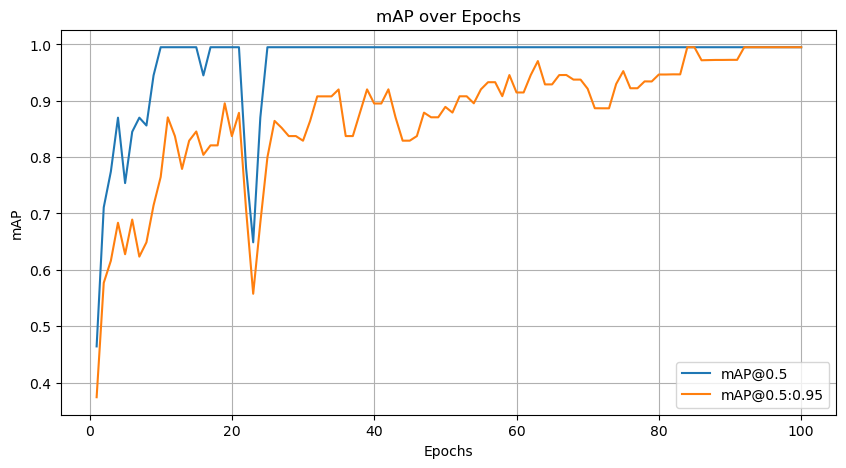

In [108]:
# Plot mAP50 and mAP50-95
plt.figure(figsize=(10, 5))
plt.plot(epochs, mAP50, label='mAP@0.5')
plt.plot(epochs, mAP50_95, label='mAP@0.5:0.95')
plt.xlabel('Epochs')
plt.ylabel('mAP')
plt.legend()
plt.title('mAP over Epochs')
plt.grid(True)
plt.show()

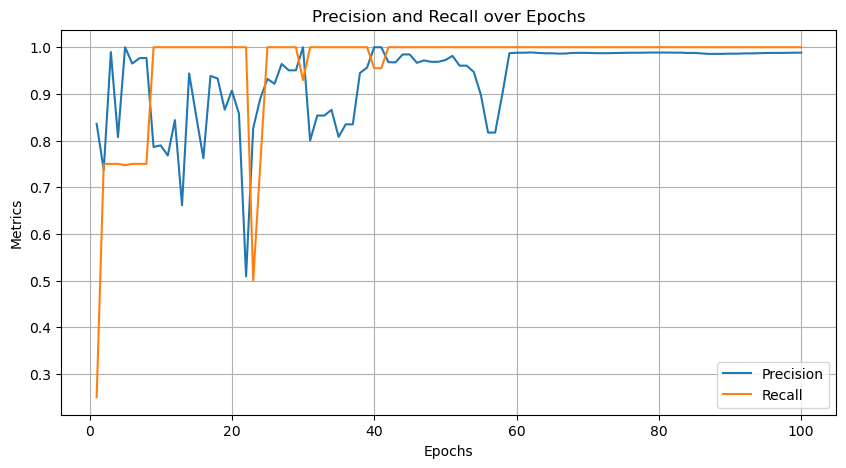

In [109]:
# Plot Precision and Recall
plt.figure(figsize=(10, 5))
plt.plot(epochs, precision, label='Precision')
plt.plot(epochs, recall, label='Recall')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.title('Precision and Recall over Epochs')
plt.grid(True)
plt.show()

In [110]:
# Replace 'path_to_your_trained_model' with the path to your saved model
model_path = './runs/detect/train4/weights/best.pt'  # Assuming you saved it as best.pt
model = YOLO(model_path)

In [111]:
image_path = './karachi_stadium.jpg'
results = model.predict(source=image_path, save=True, conf=0.25)


image 1/1 F:\DS Tools\DS Tools\Thesis\ACV\YOLO\karachi_stadium.jpg: 416x640 4 stadiums, 112.7ms
Speed: 3.0ms preprocess, 112.7ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict


In [112]:
from PIL import Image

# Load and display the image with the predictions
result_image_path = './runs/detect/predict/karachi_stadium.jpg'  # Update this path if necessary
result_image = Image.open(result_image_path)
result_image.show()
